Dave Herald subiu todas as curvas de luz de ocultações no Vizier,
Será que tem algo que podemos fazer com estes dados? Alguma busca ampla de eventos estranhos? (binarios?)
Ou outras coisas que ficaram "na gaveta"?

In [1]:
import numpy as np
import pylab as pl
import pandas as pd

from astroquery.vizier import Vizier

import requests
import io

#B/occ/asteroid	

In [2]:
v = Vizier(catalog='B/occ/asteroid')
v.ROW_LIMIT = 10000000
df = v.query_constraints()[0]

In [3]:
len(df)

6765

In [4]:
n = 1000

In [24]:
df[n]

Date,Dur,HIP,SAO,XZ80Q,Lat,Lon,Alt,ObsName,Num,Name,Seq
s,s,,,,,,m,,,,
str19,float64,int32,int32,uint8,str13,str13,int16,str29,int32,str20,int16
2008-08-10T08:14:28,37.30,0,0,0,044 29 57.500,-93 07 45.000,289,S Messner,2,Pallas,1261


In [23]:
n = 83

In [25]:
r = requests.get('https://cdsarc.cds.unistra.fr/viz-bin/vizgraph?' +
                 '-s=B/occ&' + '-i=.graph_sql&' + 'sec={}&'.format(str(df['Dur'][n])) + 'date={}&'.format(str(df['Date'][n])) +
                 'num={}&'.format(str(df['Seq'][n])) + '--output=tsv')

    

In [26]:
aaa = io.BytesIO(r.content)
lines = aaa.readlines()

time = np.array([])
flux = np.array([])

for i in range(4, len(lines)-2):
    time = np.append(time, float(lines[i].decode("utf-8").rsplit()[0]))
    flux = np.append(flux, float(lines[i].decode("utf-8").rsplit()[1]))

                     


In [27]:
lines

[b'# VizieR  - Graph output B/occ Star Occultation (2008-08-10T08:14:28 , seq=1261)\n',
 b'# Resource:occ\n',
 b'# duration (s)\n',
 b'# value\n',
 b'0.0333482 \t4445\t\n',
 b'0.0500224 \t4112\t\n',
 b'0.0666965 \t3159\t\n',
 b'0.0833706 \t3168\t\n',
 b'0.100045 \t6501\t\n',
 b'0.116719 \t5559\t\n',
 b'0.133393 \t4437\t\n',
 b'0.150067 \t3678\t\n',
 b'0.166741 \t4838\t\n',
 b'0.183415 \t3564\t\n',
 b'0.200089 \t4833\t\n',
 b'0.216764 \t6431\t\n',
 b'0.233438 \t6399\t\n',
 b'0.250112 \t6035\t\n',
 b'0.266786 \t4127\t\n',
 b'0.28346 \t6006\t\n',
 b'0.300134 \t4303\t\n',
 b'0.316808 \t4728\t\n',
 b'0.333482 \t2951\t\n',
 b'0.350156 \t3895\t\n',
 b'0.366831 \t4519\t\n',
 b'0.383505 \t4597\t\n',
 b'0.400179 \t3473\t\n',
 b'0.416853 \t4974\t\n',
 b'0.433527 \t6768\t\n',
 b'0.450201 \t5734\t\n',
 b'0.466875 \t6858\t\n',
 b'0.483549 \t7239\t\n',
 b'0.500224 \t5392\t\n',
 b'0.516898 \t6494\t\n',
 b'0.533572 \t4706\t\n',
 b'0.550246 \t4422\t\n',
 b'0.56692 \t4642\t\n',
 b'0.583594 \t4228\t\n',
 

In [22]:
df[100].columns

<TableColumns names=('Date','Dur','HIP','SAO','XZ80Q','Lat','Lon','Alt','ObsName','Num','Name','Seq')>

In [20]:
df['Name'][n]

'Camilla'

In [21]:
df['ObsName'][n]

'S Messner'

Text(0.5, 1.0, 'Pallas -- S Messner')

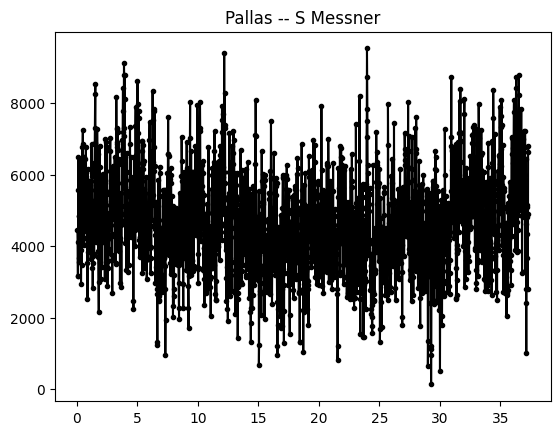

In [28]:
pl.plot(time, flux, 'k.-')
pl.title(df['Name'][n] + ' -- ' + df['ObsName'][n])

In [29]:
df[n]

Date,Dur,HIP,SAO,XZ80Q,Lat,Lon,Alt,ObsName,Num,Name,Seq
s,s,,,,,,m,,,,
str19,float64,int32,int32,uint8,str13,str13,int16,str29,int32,str20,int16
2008-08-10T08:14:28,37.30,0,0,0,044 29 57.500,-93 07 45.000,289,S Messner,2,Pallas,1261


In [ ]:
import numpy as np
import pylab as pl
import astropy.units as u
from astropy.time import Time

from sora import __version__
print('Sora version:',__version__) # Fazer um print da versão do SORA para garantir que estamos usando a correta

from sora import Observer, Occultation, Star, LightCurve
from sora.extra import draw_ellipse, ChiSquare

lc = LightCurve(name='S Messner', 
                file = 'curve_Umbriel_2020-09-21_Getrost.dat', 
                #usecols = [3,9,10], #Lembrete, Python começa na coluna 0 !!!!
                usecols = [0,1,2], #Lembrete, Python começa na coluna 0 !!!!
                exptime = 0.4996573)

In [24]:
df2 = df[df['Name'] == 'Hertha']

In [16]:
3728.11+7984.57+(7000-1358-1000-275-200-400)

15479.68

In [20]:
-1358-1000-275-200-400

-3233

In [15]:
(7000-1358-1000-275-200-400)

3767

In [22]:
df[df['Name'] == 'Pallas'][0]

Date,Dur,HIP,SAO,XZ80Q,Lat,Lon,Alt,ObsName,Num,Name,Seq
s,s,,,,,,m,,,,
str19,float64,int32,int32,uint8,str13,str13,int16,str29,int32,str20,int16
2008-08-10T08:14:28,37.30,0,0,0,044 29 57.500,-93 07 45.000,289,S Messner,2,Pallas,1261


In [28]:
time

array([ 0.0666777,  0.100017 ,  0.133355 , ..., 40.3067   , 40.34     ,
       40.3733   ])

In [29]:
flux

array([7912., 7451., 9226., ..., 7690., 7642., 7067.])

In [13]:
np.savetxt(f'lc_{df["Name"][0]}_obs_by_{df["ObsName"][0]}.dat'.replace(" ", "").replace("/", "-"), np.column_stack((time, flux)), delimiter=' ')